In [1]:
# ! pip3 install tensorflow

## Loading and Preprocessing Data

In [1]:
# basics
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import os

In [26]:
from pathlib import Path

directory = str(Path.cwd())+'/Images'
all_img_dir = [i for i in os.listdir(directory) if 'n0' in i]
Name = []
for file in all_img_dir: 
    name = file.split('-')[-1]
    Name += [name]
Name

['silky_terrier',
 'Scottish_deerhound',
 'Chesapeake_Bay_retriever',
 'Ibizan_hound',
 'haired_fox_terrier',
 'Saluki',
 'cocker_spaniel',
 'schipperke',
 'borzoi',
 'Pembroke',
 'komondor',
 'Staffordshire_bullterrier',
 'standard_poodle',
 'Eskimo_dog',
 'English_foxhound',
 'golden_retriever',
 'Sealyham_terrier',
 'Japanese_spaniel',
 'miniature_schnauzer',
 'malamute',
 'malinois',
 'Pekinese',
 'giant_schnauzer',
 'Mexican_hairless',
 'Doberman',
 'standard_schnauzer',
 'dhole',
 'German_shepherd',
 'Bouvier_des_Flandres',
 'Siberian_husky',
 'Norwich_terrier',
 'Irish_terrier',
 'Norfolk_terrier',
 'Saint_Bernard',
 'Border_terrier',
 'briard',
 'Tibetan_mastiff',
 'bull_mastiff',
 'Maltese_dog',
 'Kerry_blue_terrier',
 'kuvasz',
 'Greater_Swiss_Mountain_dog',
 'Lakeland_terrier',
 'Blenheim_spaniel',
 'basset',
 'West_Highland_white_terrier',
 'Chihuahua',
 'Border_collie',
 'redbone',
 'Irish_wolfhound',
 'bluetick',
 'miniature_poodle',
 'Cardigan',
 'EntleBucher',
 'Norwegi

In [93]:
len(Name)

120

In [142]:
def load_image(color_mode='rgb', target_size=(128, 128)):
    train_data = [] #np.array([])
    test_data = [] #np.array([])
    train_label = [] #np.array([]) 
    test_label = [] #np.array([])

    for i in range(5):   #len(Name)
        path = os.path.join(directory+'/', all_img_dir[i])

        t = 0
        for im in os.listdir(path):
            n = len(os.listdir(path))
            image = load_img(os.path.join(path+'/', im), 
                             color_mode=color_mode, #grayscale=False,  
                             target_size=target_size)
            image = img_to_array(image)
            image = image/255.0
            
            if t <= np.floor(n*0.8):
                train_data.append(image)
                train_label.append(Name[i])          
            else:
                test_data.append(image)
                test_label.append(Name[i])
        
            t+=1
    
    return train_data, test_data, train_label, test_label


In [143]:
# path = os.path.join(directory+'/', all_img_dir[0])
# for im in os.listdir(path):
#             n = len(os.listdir(path))
#             image = load_img(os.path.join(path+'/', im), 
#                              color_mode=color_mode, #grayscale=False,  
#                              target_size=target_size)
#             image = img_to_array(image)
#             image = image/255.0
            

In [144]:
train_data, test_data, train_label, test_label = load_image(color_mode='grayscale',
                                                            target_size=(128,128))

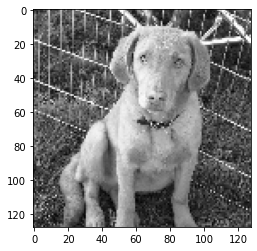

In [145]:
plt.imshow(np.array(train_data)[400], cmap='gray')

In [162]:
img = np.array(train_data).reshape((np.array(train_data).shape[0], 128**2))[0]

In [163]:
img

array([0.8509804 , 0.85882354, 0.87058824, ..., 0.8117647 , 0.81960785,
       0.81960785], dtype=float32)

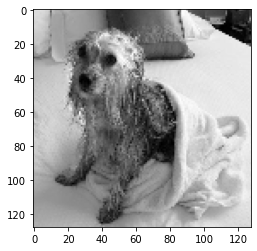

In [164]:
plt.imshow(img.reshape((128,128)), cmap='gray')

In [156]:
np.array(train_data).shape

(744, 128, 128, 1)

In [157]:
np.array(train_data).shape

(744, 128, 128, 1)

In [158]:
train_data = np.array(train_data)
test_data = np.array(test_data)

train_data = train_data.reshape((train_data.shape[0], 
                                train_data.shape[1]**2))
test_data = test_data.reshape((test_data.shape[0],
                             test_data.shape[1]**2))

train_label = np.array(train_label)
test_label = np.array(test_label)

# Let's print out the new shape
print('train shape is now: ' + str(train_data.shape))
print('test  shape is now: ' + str(test_data.shape))

train shape is now: (744, 16384)
test  shape is now: (183, 16384)


In [159]:
train_df = pd.DataFrame(train_data)
train_df['label'] = train_label

test_df = pd.DataFrame(test_data)
test_df['label'] = test_label

In [160]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,0.850980,0.858824,0.870588,0.862745,0.866667,0.850980,0.847059,0.823529,0.811765,0.800000,...,0.847059,0.831373,0.827451,0.807843,0.819608,0.831373,0.811765,0.819608,0.819608,silky_terrier
1,0.921569,0.921569,0.921569,0.925490,0.925490,0.925490,0.925490,0.925490,0.925490,0.925490,...,0.313726,0.509804,0.509804,0.509804,0.556863,0.203922,0.396078,0.435294,0.560784,silky_terrier
2,0.580392,0.411765,0.509804,0.384314,0.584314,0.643137,0.709804,0.470588,0.745098,0.698039,...,0.603922,0.607843,0.898039,0.635294,0.690196,0.705882,0.749020,0.541176,0.858824,silky_terrier
3,0.509804,0.509804,0.501961,0.494118,0.490196,0.482353,0.482353,0.482353,0.470588,0.474510,...,0.188235,0.192157,0.168627,0.149020,0.121569,0.109804,0.086275,0.062745,0.054902,silky_terrier
4,0.352941,0.368627,0.364706,0.372549,0.376471,0.384314,0.380392,0.388235,0.400000,0.400000,...,0.529412,0.521569,0.505882,0.498039,0.482353,0.470588,0.462745,0.458824,0.450980,silky_terrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,0.443137,0.411765,0.376471,0.313726,0.486275,0.525490,0.458824,0.301961,0.262745,0.270588,...,0.568627,0.623529,0.572549,0.568627,0.556863,0.592157,0.564706,0.588235,0.615686,haired_fox_terrier
740,0.415686,0.721569,0.498039,0.196078,0.141176,0.105882,0.160784,0.192157,0.027451,0.172549,...,0.274510,0.290196,0.290196,0.282353,0.274510,0.278431,0.337255,0.282353,0.290196,haired_fox_terrier
741,0.239216,0.254902,0.266667,0.290196,0.266667,0.247059,0.247059,0.250980,0.247059,0.258824,...,0.717647,0.749020,0.698039,0.694118,0.643137,0.600000,0.600000,0.647059,0.698039,haired_fox_terrier
742,0.047059,0.074510,0.066667,0.113725,0.098039,0.247059,0.172549,0.078431,0.196078,0.227451,...,0.474510,0.403922,0.470588,0.619608,0.552941,0.482353,0.517647,0.486275,0.541176,haired_fox_terrier


In [184]:
# train_df.to_csv("data/train_data.csv")
# test_df.to_csv("data/test_data.csv")

## Analysis

In [165]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
import tensorflow as tf

# evaluation
from sklearn.model_selection import (KFold, GridSearchCV)
from sklearn.metrics import (confusion_matrix, f1_score, auc, roc_curve)

In [166]:
# train_df = pd.read_csv('data/train_data.csv', index_col=[0])
# test_df = pd.read_csv('data/test_data.csv', index_col=[0])

In [167]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,0.850980,0.858824,0.870588,0.862745,0.866667,0.850980,0.847059,0.823529,0.811765,0.800000,...,0.847059,0.831373,0.827451,0.807843,0.819608,0.831373,0.811765,0.819608,0.819608,silky_terrier
1,0.921569,0.921569,0.921569,0.925490,0.925490,0.925490,0.925490,0.925490,0.925490,0.925490,...,0.313726,0.509804,0.509804,0.509804,0.556863,0.203922,0.396078,0.435294,0.560784,silky_terrier
2,0.580392,0.411765,0.509804,0.384314,0.584314,0.643137,0.709804,0.470588,0.745098,0.698039,...,0.603922,0.607843,0.898039,0.635294,0.690196,0.705882,0.749020,0.541176,0.858824,silky_terrier
3,0.509804,0.509804,0.501961,0.494118,0.490196,0.482353,0.482353,0.482353,0.470588,0.474510,...,0.188235,0.192157,0.168627,0.149020,0.121569,0.109804,0.086275,0.062745,0.054902,silky_terrier
4,0.352941,0.368627,0.364706,0.372549,0.376471,0.384314,0.380392,0.388235,0.400000,0.400000,...,0.529412,0.521569,0.505882,0.498039,0.482353,0.470588,0.462745,0.458824,0.450980,silky_terrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,0.443137,0.411765,0.376471,0.313726,0.486275,0.525490,0.458824,0.301961,0.262745,0.270588,...,0.568627,0.623529,0.572549,0.568627,0.556863,0.592157,0.564706,0.588235,0.615686,haired_fox_terrier
740,0.415686,0.721569,0.498039,0.196078,0.141176,0.105882,0.160784,0.192157,0.027451,0.172549,...,0.274510,0.290196,0.290196,0.282353,0.274510,0.278431,0.337255,0.282353,0.290196,haired_fox_terrier
741,0.239216,0.254902,0.266667,0.290196,0.266667,0.247059,0.247059,0.250980,0.247059,0.258824,...,0.717647,0.749020,0.698039,0.694118,0.643137,0.600000,0.600000,0.647059,0.698039,haired_fox_terrier
742,0.047059,0.074510,0.066667,0.113725,0.098039,0.247059,0.172549,0.078431,0.196078,0.227451,...,0.474510,0.403922,0.470588,0.619608,0.552941,0.482353,0.517647,0.486275,0.541176,haired_fox_terrier


In [168]:
X_train = train_df.iloc[:,:-1].values
y_train = train_df['label'].values

In [170]:
X_test = test_df.iloc[:,:-1].values
y_test = test_df['label'].values

In [177]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((744, 16384), (744,), (183, 16384), (183,))

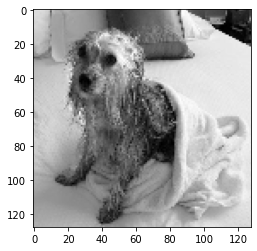

In [180]:
img = X_train[0].reshape((128,128))
plt.imshow(img, cmap='gray')

In [187]:
model = SVC()
param_grid = {'kernel':('linear', 'rbf'),
             'C': [0.5, 10]}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
clf = GridSearchCV(estimator=model, 
                   param_grid=param_grid, 
                   cv=kf,
                   verbose=3, n_jobs=-1)
clf.fit(X_train, y_train)

# View the Grid Search CV Results
pd.DataFrame(clf.cv_results_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:  1.1min remaining:   43.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.4min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,27.351476,0.289701,4.160028,0.018174,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",0.302013,0.275168,0.355705,0.335570,0.358108,0.325313,0.032130,3
1,26.747006,0.262851,4.548415,0.098775,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",0.348993,0.328859,0.382550,0.348993,0.297297,0.341339,0.027968,2
2,26.863989,0.252606,4.429024,0.031547,10,linear,"{'C': 10, 'kernel': 'linear'}",0.302013,0.275168,0.355705,0.335570,0.358108,0.325313,0.032130,3
3,18.149894,4.775678,2.952490,0.637901,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.369128,0.429530,0.442953,0.369128,0.358108,0.393769,0.035168,1
